# Compound Charts

**Learning Objective:** Be able to create compound chart with layers, horizontal and vertical concatenation, and repeating.

These examples are taken from the Altair documentation:

https://altair-viz.github.io/user_guide/compound_charts.html

In [1]:
import altair as alt
alt.data_transformers.enable('json')
from vega_datasets import data

## Layered charts

Layered charts enable you to overlay multiple charts on a single facet or subchart.

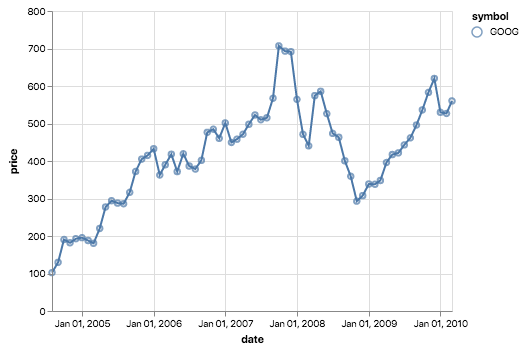

In [2]:
from altair.expr import datum

from vega_datasets import data
stocks = data.stocks.url

base = alt.Chart(stocks).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
).transform_filter(
    datum.symbol == 'GOOG'
)

base.mark_line() + base.mark_point()

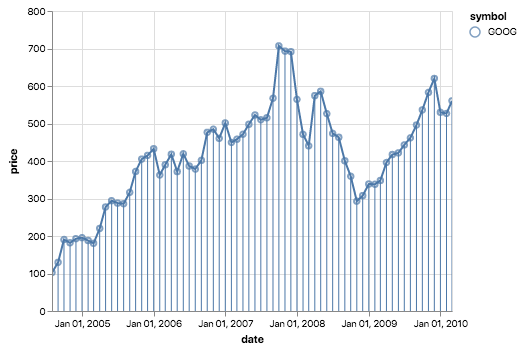

In [3]:
alt.layer(
  base.mark_line(),
  base.mark_point(),
  base.mark_rule()
).interactive()

## Horizontal concatenation

Horizontal concatenation enables you to place two charts side-by-side, without a group-by relationship between the charts.

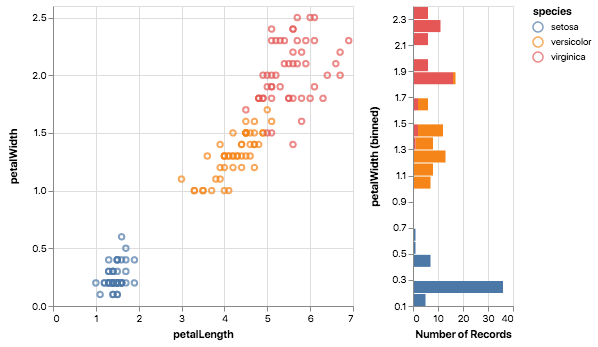

In [4]:
iris = data.iris.url

chart1 = alt.Chart(iris).mark_point().encode(
    x='petalLength:Q',
    y='petalWidth:Q',
    color='species:N'
).properties(
    height=300,
    width=300
)

chart2 = alt.Chart(iris).mark_bar().encode(
    x='count()',
    y=alt.Y('petalWidth:Q', bin=alt.Bin(maxbins=30)),
    color='species:N'
).properties(
    height=300,
    width=100
)

chart1 | chart2

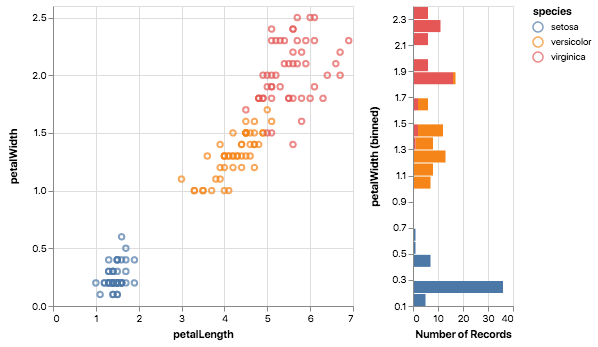

In [5]:
alt.hconcat(chart1, chart2)

## Vertical concatenation

Vertical concatenation enables you to place two chart above/below each other, without a group-by relationship between the charts.

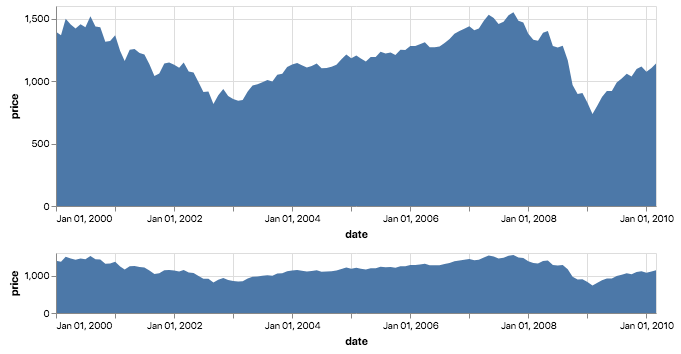

In [6]:
sp500 = data.sp500.url

brush = alt.selection(type='interval', encodings=['x'])

upper = alt.Chart(sp500).mark_area().encode(
    x=alt.X('date:T', scale={'domain': brush.ref()}),
    y='price:Q'
).properties(
    width=600,
    height=200
)

lower = upper.properties(
    selection=brush,
    height=60
)

alt.vconcat(upper, lower)

## Repeated charts

Repeated charts enable you to create a particular type of horizontal or vertical stacking, where the charts vary only in one or more encodings.

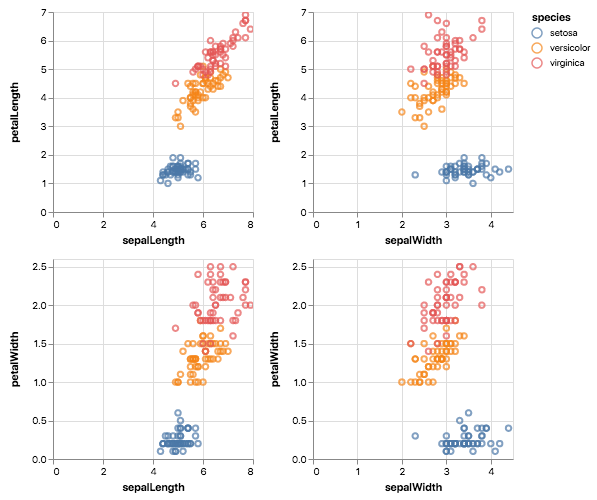

In [7]:
iris = data.iris.url

base = alt.Chart().mark_point().encode(
    color='species:N'
).properties(
    width=200,
    height=200
).interactive()

chart = alt.vconcat(data=iris)
for y_encoding in ['petalLength:Q', 'petalWidth:Q']:
    row = alt.hconcat()
    for x_encoding in ['sepalLength:Q', 'sepalWidth:Q']:
        row |= base.encode(x=x_encoding, y=y_encoding)
    chart &= row
chart

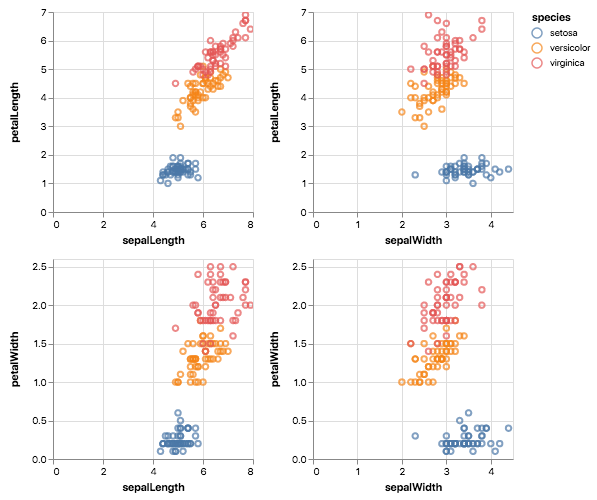

In [8]:
import altair as alt
from vega_datasets import data
iris = data.iris.url

alt.Chart(iris).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species:N'
).properties(
    width=200,
    height=200
).repeat(
    row=['petalLength', 'petalWidth'],
    column=['sepalLength', 'sepalWidth']
).interactive()